# Neural Prophet
Fusing traditional time series algorithms using standard deep learning methods, built on PyTorch, inspired by Facebook Prophet and AR-Net.

In [3]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

### Fund volume in RUB

In [4]:
df = pd.read_excel('../data_excel/Dannye_FNB.xlsx', header=2)

df = df[:25] # delete footnotes
df.drop(columns=['№ п/п', 'Январь 2008*'], inplace=True)
df.drop(index=0, inplace=True)

# Melt the dataframe to long format
df_long = pd.melt(
    df,
    id_vars=["Показатель"],
    var_name="ds",
    value_name="y"
)

# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем на конец периода"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

NeuralProphet used the default parameter of 10 changepoints and fit them to our data.

In [11]:
m = NeuralProphet(
                  # Disable change trendpoints
                  # n_changepoints=0,
                  # Disable seasonality components
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                )
metrics = m.fit(prophet_data)
forecast = m.predict(prophet_data)
m.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.507]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows with NaNs in 'y' column.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 190


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (13) is too small than the required number                     for the learning rate finder (212). The results might not be optimal.


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.507]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '76955dcd-132d-4735-98ac-8f4d46a6daf3',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0),
                          datetime.datetime(2024, 12, 1, 0, 0)], dtype=object),
              'y': array([  735.5297,   853.3142,   979.2218, ..., 12857.055 , 12876.111 ,
                          12894.553 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'u

In [12]:
m.plot_parameters(components=["trend"])

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '4ec22d9b-cb08-419a-afd2-09979a0b13be',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0),
                          datetime.datetime(2024, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([  735.52972796,   853.31423853,   979.2218188 , ..., 12857.05447261,
                          12876.11069488, 12894.55220031]),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hov

In [13]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(prophet_data, n_historic_predictions=True, periods=12)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.507]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'a5201419-2715-46e7-b383-bbb8341f820a',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 10, 1, 0, 0),
                          datetime.datetime(2025, 11, 1, 0, 0),
                          datetime.datetime(2025, 12, 1, 0, 0)], dtype=object),
              'y': array([  735.5297,   853.3142,   979.2218, ..., 13081.428 , 13100.482 ,
                          13118.924 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'u

In [14]:
m.plot_components(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '094c22b4-3b43-4a98-a979-5923c98390e2',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 10, 1, 0, 0),
                          datetime.datetime(2025, 11, 1, 0, 0),
                          datetime.datetime(2025, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([  735.5297,   853.3142,   979.2218, ..., 13081.428 , 13100.482 ,
                          13118.924 ], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hovermo

In [20]:
forecast.tail(12)

,ds,y,yhat1,trend
203,2025-01-01,NaN,12913.609375,12913.609375
204,2025-02-01,NaN,12932.666016,12932.666016
205,2025-03-01,NaN,12949.876953,12949.876953
206,2025-04-01,NaN,12968.933594,12968.933594
207,2025-05-01,NaN,12987.375000,12987.375000
208,2025-06-01,NaN,13006.431641,13006.431641
209,2025-07-01,NaN,13024.873047,13024.873047
210,2025-08-01,NaN,13043.929688,13043.929688
211,2025-09-01,NaN,13062.986328,13062.986328
212,2025-10-01,NaN,13081.427734,13081.427734


### Fund volume in USD

In [36]:
# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем средств фонда на конец периода (млрд. долларов США)"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

In [37]:
m = NeuralProphet(
                  # Disable change trendpoints
                  # n_changepoints=0,
                  # Disable seasonality components
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                )
metrics = m.fit(prophet_data)
forecast = m.predict(prophet_data)
m.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.507]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 190


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (13) is too small than the required number                     for the learning rate finder (212). The results might not be optimal.


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.507]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '16445728-d6ec-46b0-8706-f68b5c17e6c1',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0),
                          datetime.datetime(2024, 12, 1, 0, 0)], dtype=object),
              'y': array([ 54.499367,  55.844284,  57.281944, ..., 144.75084 , 144.18544 ,
                          143.63828 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'u

In [30]:
m.plot_parameters(components=["trend"])

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '5ad1f100-0072-4f7d-b08f-01b0c5c1ff48',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2024, 10, 1, 0, 0),
                          datetime.datetime(2024, 11, 1, 0, 0),
                          datetime.datetime(2024, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 57.67283025,  58.87145737,  60.15274842, ..., 151.24807177,
                          151.05071714, 150.8597288 ]),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hovermode': 'x 

In [31]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(prophet_data, n_historic_predictions=True, periods=12)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.507]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'cf2362a0-5b90-4b4a-894a-0270ab49e34d',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 10, 1, 0, 0),
                          datetime.datetime(2025, 11, 1, 0, 0),
                          datetime.datetime(2025, 12, 1, 0, 0)], dtype=object),
              'y': array([ 57.672832,  58.87146 ,  60.15275 , ..., 148.9244  , 148.72704 ,
                          148.53604 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'u

In [32]:
m.plot_components(forecast)

WARNING - (py.warnings._showwarnmsg) - c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '1c34abda-5eba-4f32-a7a1-db0712b03371',
              'x': array([datetime.datetime(2008, 2, 1, 0, 0),
                          datetime.datetime(2008, 3, 1, 0, 0),
                          datetime.datetime(2008, 4, 1, 0, 0), ...,
                          datetime.datetime(2025, 10, 1, 0, 0),
                          datetime.datetime(2025, 11, 1, 0, 0),
                          datetime.datetime(2025, 12, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 57.672832,  58.87146 ,  60.15275 , ..., 148.9244  , 148.72704 ,
                          148.53604 ], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'autosize': True,
               'font': {'size': 10},
               'height': 210,
               'hovermo

In [26]:
forecast.tail(12)

,ds,y,yhat1,trend
203,2025-01-01,NaN,141.125626,141.125626
204,2025-02-01,NaN,140.467239,140.467239
205,2025-03-01,NaN,139.872589,139.872589
206,2025-04-01,NaN,139.214203,139.214203
207,2025-05-01,NaN,138.577072,138.577072
208,2025-06-01,NaN,137.918686,137.918686
209,2025-07-01,NaN,137.281555,137.281555
210,2025-08-01,NaN,136.623169,136.623169
211,2025-09-01,NaN,135.964798,135.964798
212,2025-10-01,NaN,135.327652,135.327652


## Residuals (USD)

In [34]:
df=forecast[:203]

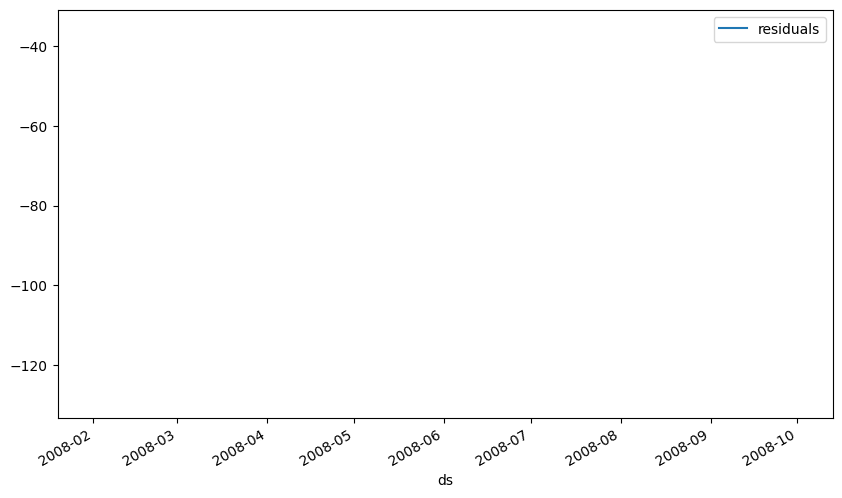

In [35]:
df_residuals = pd.DataFrame({"ds": prophet_data["ds"], "residuals": prophet_data["y"] - df["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))